<a href="https://colab.research.google.com/github/43pratik/DL_Lab/blob/main/DL_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
np.random.seed(0)
n_samples=30
true_function=lambda X:np.cos(1.5*np.pi*X)
X=np.sort(np.random.rand(n_samples))
y=true_function(X)+np.random.rand(n_samples)*0.1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
degrees = [1, 4, 15]

In [ ]:
results = []
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train[:, np.newaxis], y_train)


    scores = cross_val_score(
        pipeline, X_train[:, np.newaxis], y_train, scoring="neg_mean_squared_error", cv=10
    )
    results.append({"pipeline": pipeline, "scores": scores})

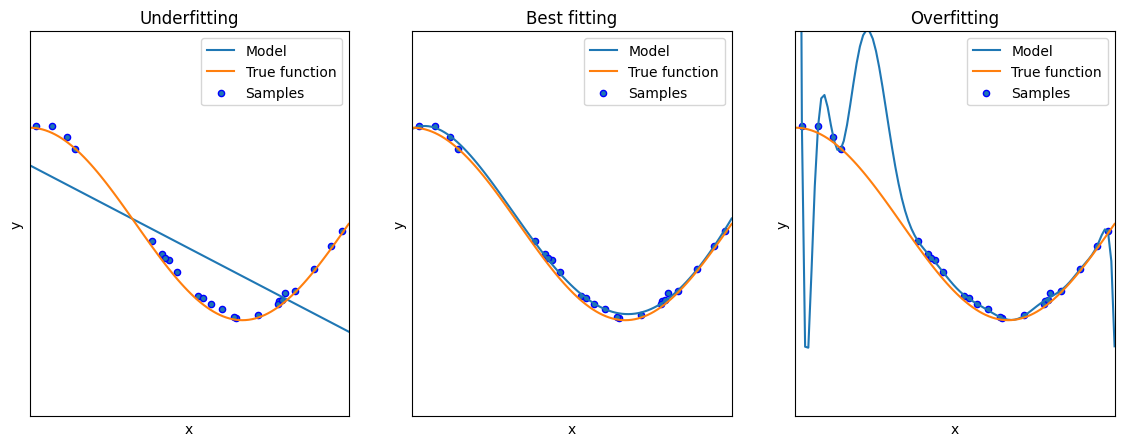

In [ ]:
titles = ["Underfitting", "Best fitting", "Overfitting"]
plt.figure(figsize=(14, 5))
for i, result in enumerate(results):
    pipeline = result["pipeline"]
    scores = result["scores"]
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    X_test_plot = np.linspace(0, 1, 100)
    plt.plot(
        X_test_plot,
        pipeline.predict(X_test_plot[:, np.newaxis]),
        label="Model",
    )
    plt.plot(X_test_plot, true_function(X_test_plot), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(titles[i])
plt.show()